# Debugging Hands On

In this hands-on tutorial, you will attempt to debug a simple python script **without adding any `print()` statements**, using only the PDB debugger (for the 3rd part, you may also use a GUI debugger like the one included in *PyCharm* if you already know how to use it)

For this hands-on session, you will try debugging code in several ways: 

1. within the ipython notebook
2. on the command-line using ipython after an exception
3. on the command-line using pdb


** Common debugging commands: **

* `r`: start to *run* script
* `n`: execute *next* line
* `s`: *step* into a function call (not to next line)
* `bt`: show full stack backtrace 
* `l` or `ll`: print the code that is currently executing
* `c` continue running until next error or breakpoint
* `q`: quit the debugger


## Part 1: debugging an ipython notebook function:



Here is a small program that we want to debug:

Remember: we can use ``breakpoint()`` to start the debugger, or use `%debug` after an error

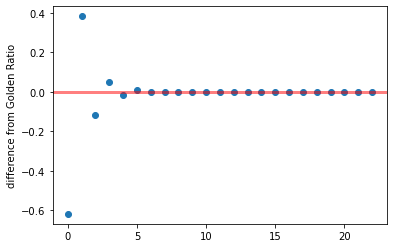

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

GOLDEN = (1 + 5 ** 0.5) / 2


def fibonacci(k):

    if k == 0:
        return 0
    if k == 1:
        return 1

    return fibonacci(k - 2) + fibonacci(k - 1)


def compute_golden_ratio(accuracy_level=10):
    return fibonacci(accuracy_level) / fibonacci(accuracy_level - 1)


def plot_golden_ratio_approx(max_k=20):

    ratios = []

    for ii in range(2, max_k):
        ratio = compute_golden_ratio(ii)
        ratios.append(ratio - GOLDEN)

    plt.axhline(0, alpha=0.5, lw=3, color="red")
    plt.scatter(np.arange(len(ratios)), ratios)
    plt.ylabel("difference from Golden Ratio")


if __name__ == "__main__":

    MAX_VAL = 25
    plot_golden_ratio_approx(MAX_VAL)

### Task: debug this
Try to debug `plot_golden_ratio_approx`.  **There are at least 2 bugs in this code.**  (you may see them just by looking, but even so try to follow the flow of the program adding `set_trace` somewhere in the `print_directory_stats` function, and then using the debugging commands to explore variables and move into `count_types`. Make sure you run the funciton on multiple directories, to make sure all work!

Make sure you type 'q' in the debug input window at the end, otherwise you will not be able to continue (or restart your notebook kernel)

In [10]:
%debug

> /tmp/ipykernel_6439/4043541441.py(31)plot_golden_ratio_approx()
     29 
     30     plt.axhline(0, alpha=0.5, lw=3, color="red")
---> 31     plt.scatter(np.arange(len(ratios), ratios))
     32     plt.ylabel("difference from Golden Ratio")
     33 

ipdb> q


## Part 2: debugging a script after an exception

For this tutorial, you will need to open a terminal and navigate to this directory

      in Jupyter Lab, in the menu bar choose  File -> New -> Terminal


The script we will work with is called 

```
debug_fermi.py
```

It's a contrived example, but just opens the Fermi catalog, extracts the RA/Dec columns and a list of user-columns. For each user-column, it makes a spatial plot of galactic lon/lat with the color as the value, and a histogram plot of the value.


run the script in ipython in interactive mode using `ipython --matplotlib -i fermi_demo.py` and it should fail with an exception.  

Enter the ipython debugger by issuing the magic command:
```
%debug
```

Move up and down the stack (`u` and `d`) and try to find out where and why the script is failing. Try to fix it!  You can see the value of any variable by typing the variable name, and even execute any python statements using the variables in the current scope.  

**hint:** to see what column names are available in an Astropy `Table` object, print the `.colnames` attribute.

*** Fix the bug, and let the program run ***


## Part 3: debugging a script with pdb

Now, we will use the debugger to work with a script *does not throw an exception* (and therefore runs fine), but where we want to explore the code without adding print statements.   For that, we need to run the script entirely in a debugger.

again, in your terminal, run the script in debugging mode as follows:

###  first try running the script as usual:

```
$ python debug_fermi.py
```

and verify that it runs without an exception (you should have fixed it in step 1).

### Next, explore the program as it runs...

Your task is to add a third column to plot in the `cols` array in the main part of the program.  Of course you could open the catalog in a FITS viewer and see what columns are there, but let's say you don't have that option, and want to do it without modifying the code.

Run the script in the debugger:

```
$ python -m pdb fermi_demo.py
```

Now, nothing is happening, so you need to start the program running. 

1. First type `l` to see where you are (at the top!)
2. Use the `n` command to step through lines (use `l` again every so often to see where you are)
3. when you get to the line that is `ra,dec,data = get_data(...)`, type `s` to step into it
4. keep going until the table is loaded into the `table` object, and try printing `table` and `table.colnames`, as well as other attiributes


### finally, try setting a breakpoint

Obviously, it was tedius to step through all lines of code until the one you wanted, so instead do the same with a breakpoint. To set a breakpoint, use the `break <line number>` command, and then `c` to continue execution to the breakpoint so that you can jump immediately to that line of code, and then use the `c` (continue) command to continue the loop and explore the output at each iteration.

1. start the debugger again
2. type `ll` to get a longer listing
3. add a breakpoint on the line you want to stop at (you can set more than one)
4. type `ll` again to see where your breakpoints are
4. type `c` to continue running until the next breakpoint
5. explore variables again...
6. try typing `c` again to continue to another breakpoint (try setting on in the for-loop in the main section, so you can visit it more than once)


#### Questions to answer using only the debugger, no code!:

* what is the full data type of the variable `gcoord` on line 66?

* how many entries were read from the catalog?

* what is the mean declination of the objects that were read?

### If you have time and PyCharm installed...

Try the same with the PyCharm debugger.  